# Import Library & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def overview():
    data = pd.read_csv("/Cereals.csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data

data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4              Almond_Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110

# Data Prepartion

In [ ]:
# Hitung jumlah - 1 di dataset (- 1 artinya NaN)
data[data == -1].count(axis=0)

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [ ]:
# Hilangkan - 1
data = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data[data == -1].count(axis=0)

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


# Data Insight & Visualization

In [ ]:
# Hitung jumlah manufacturers
data['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
R,7
Q,7
N,5
A,1


<Axes: xlabel='mfr', ylabel='rating'>

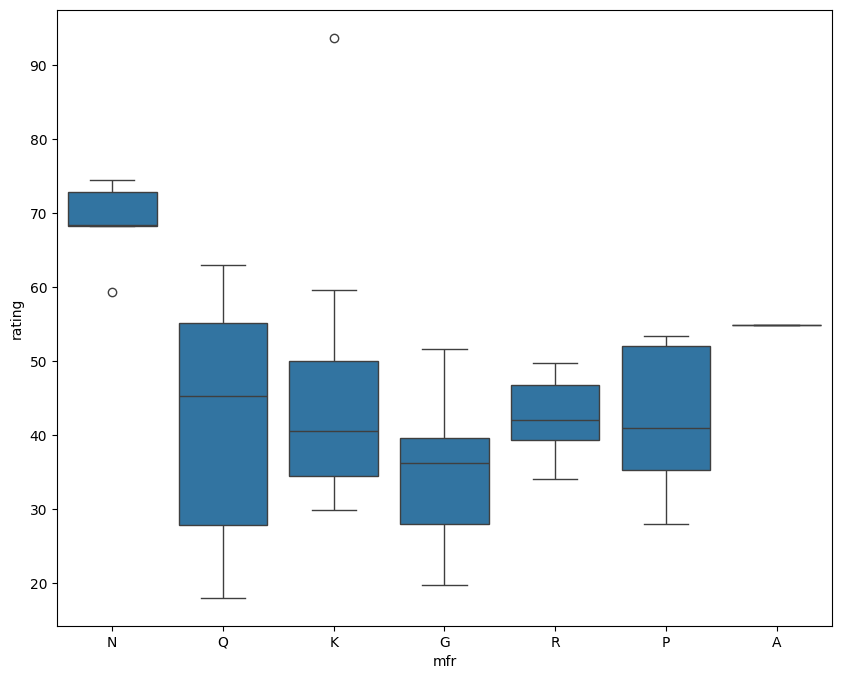

In [ ]:
# Visualisasi Perbandingan antara Manufacturers & Rating
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = "mfr", y = "rating")

In [ ]:
# 4 Nabisco Cereals yang memiliki rating tinggi
data.loc[data['mfr'] == "N"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
63,Shredded_Wheat,N,C,80,2,0,0,3.0,16.0,0.0,95.0,0,1,0.83,1.00,68.235885
64,Shredded_Wheat_'n'Bran,N,C,90,3,0,0,4.0,19.0,0.0,140.0,0,1,1.00,0.67,74.472949
65,Shredded_Wheat_spoon_size,N,C,90,3,0,0,3.0,20.0,0.0,120.0,0,1,1.00,0.67,72.801787
68,Strawberry_Fruit_Wheats,N,C,90,2,0,15,3.0,15.0,5.0,90.0,25,2,1.00,1.00,59.363993


In [ ]:
# Rating terendah
data.loc[data['rating'] == min(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


In [ ]:
# Rating terbaik
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.5,93.704912


In [ ]:
# Urutkan data berdasarkan kolom 'rating' dari tertinggi ke terendah
sorted_data_by_rating = data.sort_values(by='rating', ascending=False)

# Tampilkan 10 sereal dengan rating tertinggi
print("10 Sereal dengan Rating Tertinggi:")
display(sorted_data_by_rating.head(10))

# Tampilkan 10 sereal dengan rating terendah
print("\n10 Sereal dengan Rating Terendah:")
display(sorted_data_by_rating.tail(10))

10 Sereal dengan Rating Tertinggi:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Health_Grade
3,All-Bran_with_Extra_Fiber,2,0,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912,Healthy
64,Shredded_Wheat_'n'Bran,3,0,90,3,0,0,4.0,19.0,0.0,140.0,0,1,1.00,0.67,74.472949,Healthy
65,Shredded_Wheat_spoon_size,3,0,90,3,0,0,3.0,20.0,0.0,120.0,0,1,1.00,0.67,72.801787,Healthy
0,100%_Bran,3,0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973,Healthy
63,Shredded_Wheat,3,0,80,2,0,0,3.0,16.0,0.0,95.0,0,1,0.83,1.00,68.235885,Healthy
55,Puffed_Wheat,5,0,50,2,0,0,1.0,10.0,0.0,50.0,0,3,0.50,1.00,63.005645,Healthy
54,Puffed_Rice,5,0,50,1,0,0,0.0,13.0,0.0,15.0,0,3,0.50,1.00,60.756112,Healthy
50,Nutri-grain_Wheat,2,0,90,3,0,170,3.0,18.0,2.0,90.0,25,3,1.00,1.00,59.642837,Healthy
2,All-Bran,2,0,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505,Healthy
68,Strawberry_Fruit_Wheats,3,0,90,2,0,15,3.0,15.0,5.0,90.0,25,2,1.00,1.00,59.363993,Healthy



10 Sereal dengan Rating Terendah:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Health_Grade
70,Total_Raisin_Bran,1,0,140,3,1,190,4.0,15.0,14.0,230.0,100,3,1.5,1.00,28.592785,Unhealthy
29,Fruity_Pebbles,4,0,110,1,1,135,0.0,13.0,12.0,25.0,25,2,1.0,0.75,28.025765,Unhealthy
73,Trix,1,0,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,Unhealthy
42,Lucky_Charms,1,0,110,2,1,180,0.0,12.0,12.0,55.0,25,2,1.0,1.00,26.734515,Unhealthy
31,Golden_Grahams,1,0,110,1,1,280,0.0,15.0,9.0,45.0,25,2,1.0,0.75,23.804043,Unhealthy
14,Cocoa_Puffs,1,0,110,1,1,180,0.0,12.0,13.0,55.0,25,2,1.0,1.00,22.736446,Unhealthy
18,Count_Chocula,1,0,110,1,1,180,0.0,12.0,13.0,65.0,25,2,1.0,1.00,22.396513,Unhealthy
35,Honey_Graham_Ohs,5,0,120,1,2,220,1.0,12.0,11.0,45.0,25,2,1.0,1.00,21.871292,Unhealthy
12,Cinnamon_Toast_Crunch,1,0,120,1,3,210,0.0,13.0,9.0,45.0,25,2,1.0,0.75,19.823573,Unhealthy
10,Cap'n'Crunch,5,0,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851,Unhealthy


In [ ]:
# Pengaruh Panas dan Dingin Cereal
print(data['type'].value_counts())
data.loc[data['type'] == "H"]

type
C    73
H     1
Name: count, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
43,Maypo,A,H,100,4,1,0,0.0,16.0,3.0,95.0,25,2,1.0,1.0,54.850917


Text(0.5, 1.0, 'Carbs')

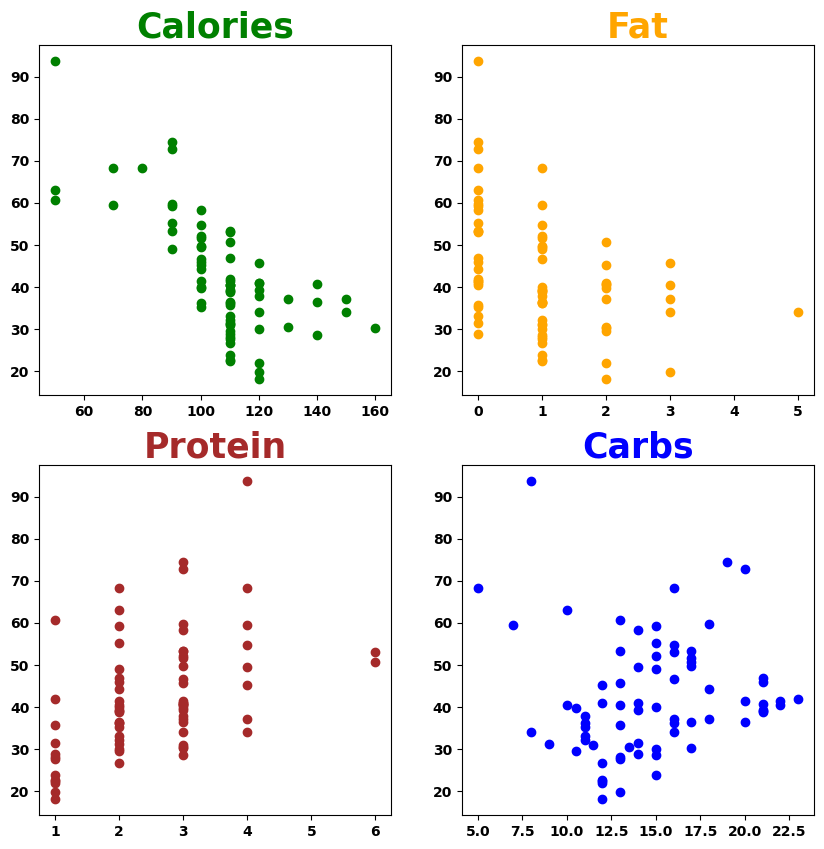

In [ ]:
# Pengaruh Macronutrients dan Kalori terhadap Ratings
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="green")
ax1.set_title('Calories', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Fat', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="brown")
ax3.set_title('Protein', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="blue")
ax4.set_title("Carbs", fontdict=fontdict, color="blue")


Kita dapat melihat bahwa ketika jumlah kalori per sajian, lemak, dan karbohidrat meningkat, rating sereal cenderung menurun.
Kita juga melihat adanya hubungan positif antara protein dan rating.

Text(0.5, 1.0, 'Vitamins')

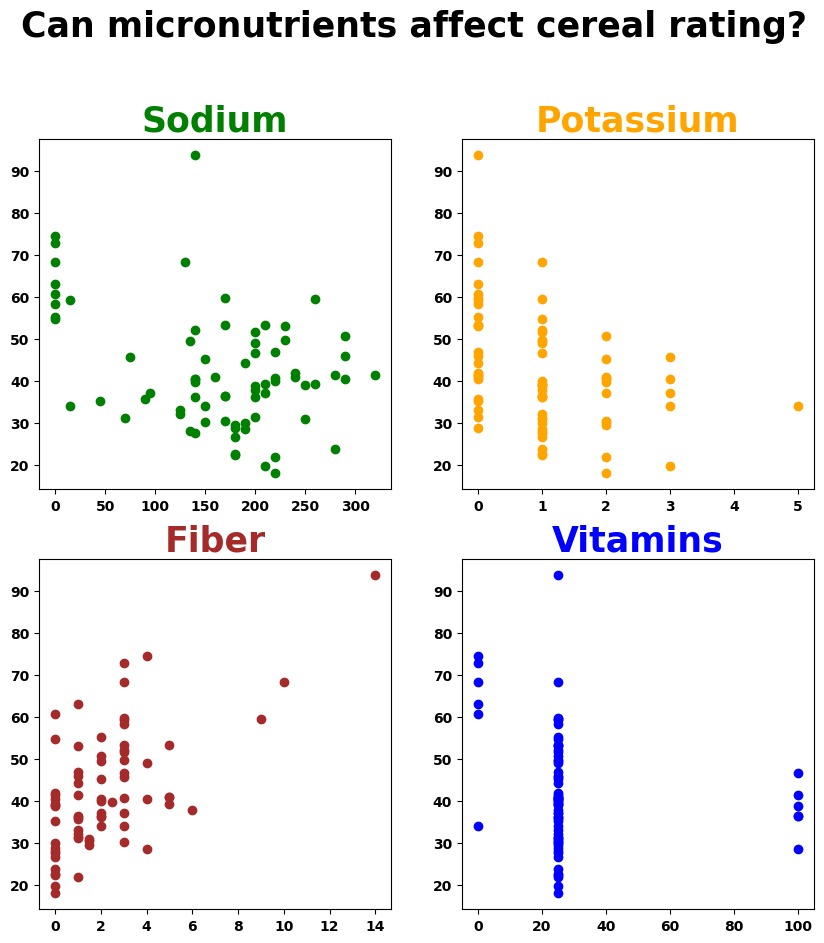

In [ ]:
# Pengaruh Micronutrients terhadap Rating
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="green")
ax1.set_title('Sodium', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Potassium', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="brown")
ax3.set_title('Fiber', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="blue")
ax4.set_title("Vitamins", fontdict=fontdict, color="blue")


Untuk sodium dan potassium, kita mengamati hubungan negatif, di mana rating menurun seiring dengan meningkatnya konsentrasi sodium dan potassium.

Rating meningkat seiring dengan bertambahnya gram serat pangan (dietary fiber).
Vitamin tidak menunjukkan hubungan yang jelas dalam konteks ini.

Text(0.5, 1.0, 'Cups per serving')

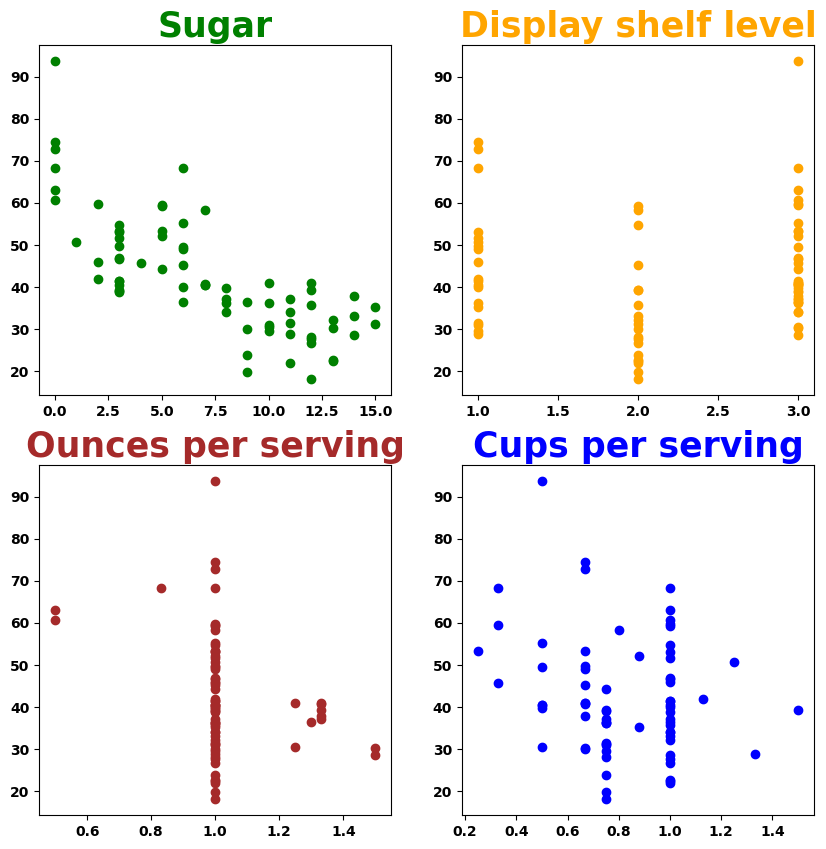

In [ ]:
# Pengaruh Sugar, Display Shelf Level, Weight dan Cups terhadap Rating
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(221)
ax1.scatter('sugars', 'rating', data= data, c="green")
ax1.set_title('Sugar', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('shelf', 'rating', data=data, c="orange")
ax2.set_title('Display shelf level', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('weight', 'rating', data=data, c="brown")
ax3.set_title('Ounces per serving', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('cups', 'rating', data=data, c="blue")
ax4.set_title("Cups per serving", fontdict=fontdict, color="blue")


Rating menurun seiring dengan meningkatnya kadar gula, cangkir per sajian, dan ons per sajian.

Sereal pada level 1 dan 3 cenderung memiliki performa yang baik. Saya sangat meragukan adanya korelasi antara display level dan rating.

In [ ]:
# Use label encoder on categorical data
le = LabelEncoder()

# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates())
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates())
data.type = le.transform(data.type)

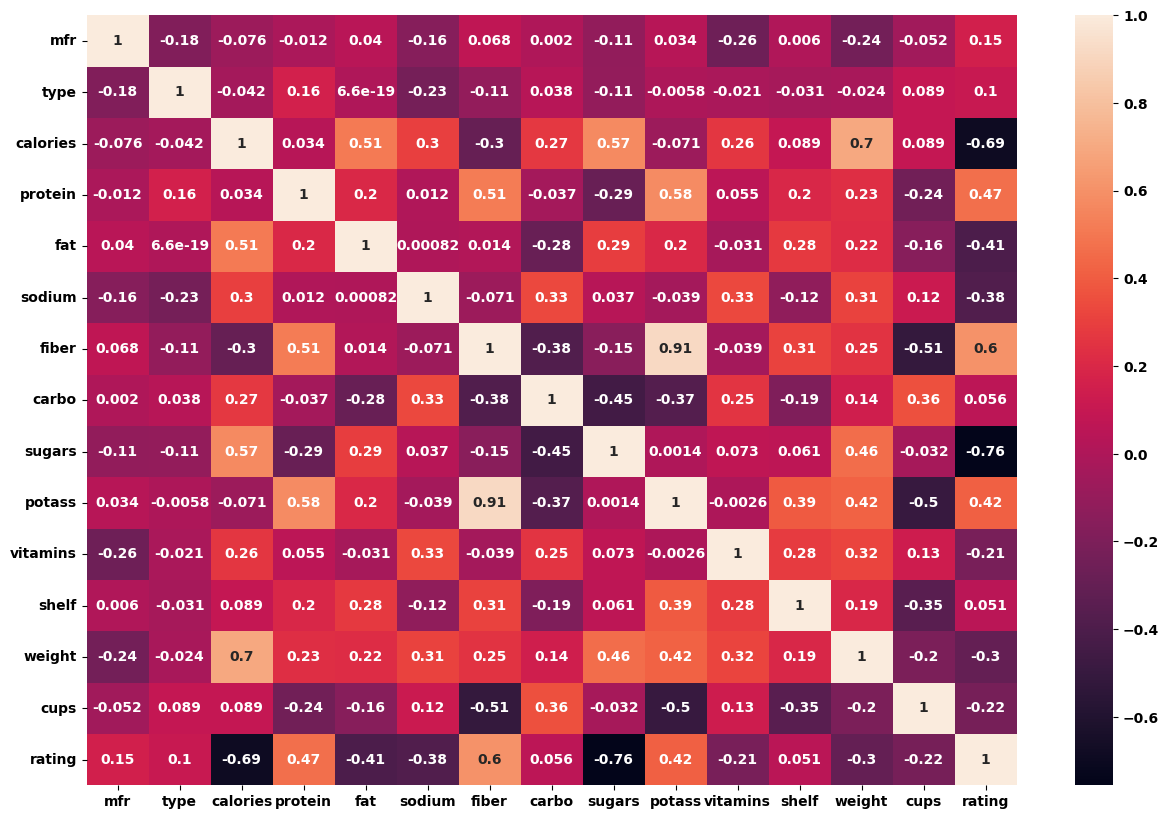

In [ ]:
plt.figure(figsize=(15,10))

# Drop the non-numeric 'name' column before calculating correlation
corrMatrix = data.drop('name', axis=1).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Klasifikasi

In [ ]:
# Tentukan batas untuk 'Health_Grade' berdasarkan rata-rata rating
mean_rating = data['rating'].mean()
data['Health_Grade'] = data['rating'].apply(lambda x: 'Healthy' if x >= mean_rating else 'Unhealthy')
print(data[['rating', 'Health_Grade']].head())

      rating Health_Grade
0  68.402973      Healthy
1  33.983679    Unhealthy
2  59.425505      Healthy
3  93.704912      Healthy
5  29.509541    Unhealthy


In [ ]:
# Tentukan X (Fitur) dan Y (Target)
X = data.drop(columns=['name', 'rating', 'Health_Grade'])
Y = data['Health_Grade']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Lakukan prediksi pada data pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.86      1.00      0.92         6
   Unhealthy       1.00      0.94      0.97        17

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23


Confusion Matrix:
[[ 6  0]
 [ 1 16]]



--- Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.86      1.00      0.92         6
   Unhealthy       1.00      0.94      0.97        17

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23



/tmp/ipython-input-4227230790.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


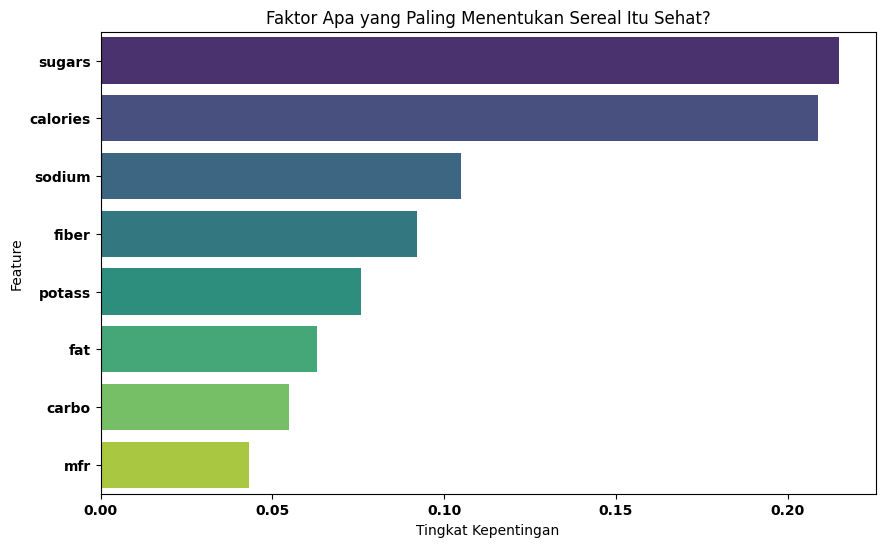

In [ ]:
# --- 6. Evaluasi & Feature Importance ---
print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred))

# Visualisasi Feature Importance (Kunci Jawaban Analisis)
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(8)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Faktor Apa yang Paling Menentukan Sereal Itu Sehat?')
plt.xlabel('Tingkat Kepentingan')
plt.show()